<a href="https://colab.research.google.com/github/LakshmiMedapati96/DM-Kaggle_Text_Classification/blob/main/Movie_Review_NBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download ulrikthygepedersen/rotten-tomatoes-reviews

rotten-tomatoes-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip rotten-tomatoes-reviews

Archive:  rotten-tomatoes-reviews.zip
replace rt_reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: rt_reviews.csv          


**Importing Libraries and Loading the dataset**

In [ ]:
# The "encoding='latin-1'" in the below line of code were taken from Reference [1].

import pandas as pd
import re
from sklearn.model_selection import train_test_split
from collections import defaultdict
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("rt_reviews.csv", encoding='latin-1')
data.head()

Freshness                                             Review
0     fresh   Manakamana doesn't answer any questions, yet ...
1     fresh   Wilfully offensive and powered by a chest-thu...
2    rotten   It would be difficult to imagine material mor...
3    rotten   Despite the gusto its star brings to the role...
4    rotten   If there was a good idea at the core of this ...

**Data Cleaning**

In [ ]:
# All the lines of code in this cell were taken from Reference [3].

# Define function for removing square brackets and special characters
def remove_square_brackets_special_characters(text):
    text = re.sub('\[[^]]*\]','', text)
    text = re.sub(r'[^a-zA-z0-9\s]','',text)
    return text

# Apply function on review column
data['Review'] = data['Review'].apply(remove_square_brackets_special_characters)

# data.head()
data.shape

(480000, 2)

**Dividing the dataset into Train, Development and Test sets**

In [ ]:
# All the lines of code in this cell were written by me by referring to Reference [2].

# Split the data into training and remaining datasets
trainset, remset = train_test_split(data, train_size = 0.6)

# Split the remaining dataset into development and test datasets
devset, testset = train_test_split(remset, train_size = 0.5)

trainset.shape, devset.shape, testset.shape

((288000, 2), (96000, 2), (96000, 2))

**Build vocabulary as dictionary**

In [ ]:
# All the lines of code in this cell were written by me.

# Defining a function to build vocabulary as dictionary and 
# omitting rare words (if the occurrence is less than five times)
def build_vocab_dict(dataset, flag=False):
    vocab_dict = {}
    for review in dataset["Review"]:
        review = review.split(" ")
        # print(review)
        for word in review:
            word = word.lower()
            if word in vocab_dict:
                vocab_dict[word] += 1
            else:
                vocab_dict[word] = 1
    vocab_dict.pop('')                                     # for removing '' in the dictionary
    if flag:
        return vocab_dict
    total_vocab_dict = {k: v for k, v in vocab_dict.items() if v >= 5}
#print(str(total_word_dict)[:1000] + "...........")
    return total_vocab_dict

**Total words dictionary - Entire dataset and Training data**

In [ ]:
# All the lines of code in this cell were written by me.

total_word_dict = build_vocab_dict(data)                        # dictionary for entire dataset

total_word_dict_train = build_vocab_dict(trainset)              # dictionary for training dataset
print(f"Total words in the dictionary (train set): {total_word_dict_train}")

Total words in the dictionary (train set): {'brooks': 175, 'has': 19464, 'a': 225160, 'good': 11150, 'ear': 156, 'for': 48296, 'everyday': 220, 'wit': 1113, 'and': 188573, 'eye': 1013, 'livedin': 62, 'detail': 652, 'the': 325671, 'films': 9820, 'problems': 719, 'go': 3944, 'deeper': 492, 'than': 19649, 'its': 77685, 'outdated': 74, 'source': 662, 'of': 186164, 'mockery': 57, 'narrative': 3033, 'sloppiness': 25, 'worse': 1112, 'anything': 3210, 'else': 1794, 'just': 14801, 'not': 26504, 'all': 20504, 'that': 75076, 'funny': 6585, 'quite': 4250, 'fairest': 11, 'in': 85848, 'land': 643, 'but': 55922, 'certainly': 1930, 'fair': 417, 'enough': 8036, 'to': 136303, 'keep': 2403, 'you': 26678, 'enchanted': 71, 'by': 23172, 'sets': 754, 'costumes': 265, 'delightful': 590, 'chris': 372, 'hemsworth': 50, 'mctiernans': 7, 'washout': 14, 'military': 228, 'drama': 6145, 'basic': 593, 'is': 114196, 'aptly': 65, 'titled': 132, 'if': 16678, 'any': 7282, 'excessive': 227, 'repetitive': 475, 'spotty': 37

**Calculating prior probabilities**

In [ ]:
# All the lines of code in this cell were written by me.

# Creating separate dataframes for fresh and rotten datasets
fresh_df = trainset[trainset["Freshness"] == 'fresh']
rotten_df = trainset[trainset["Freshness"] == 'rotten']
#print(fresh_df)
#print(rotten_df)

# Probabilities for fresh and rotten classes
prob_fresh = fresh_df.shape[0]  / (fresh_df.shape[0] + rotten_df.shape[0])
prob_rotten = rotten_df.shape[0]  / (fresh_df.shape[0] + rotten_df.shape[0])

print(f"P(rotten) = {str(prob_rotten)}")
print(f"P(fresh) = {str(prob_fresh)}")

P(rotten) = 0.4999166666666667
P(fresh) = 0.5000833333333333


**Creating separate word dictionaries for fresh and rotten classes**

In [ ]:
# All the lines of code in this cell were written by me.

# fresh word dictionary
fresh_word_dict_train = build_vocab_dict(fresh_df)
print(f"Words dictionary for fresh label: {fresh_word_dict_train}")

# rotten word dictionary
rotten_word_dict_train = build_vocab_dict(rotten_df)
print(f"Words dictionary for rotten label: {rotten_word_dict_train}")

Words dictionary for fresh label: {'with': 28915, 'russell': 151, 'crowe': 139, 'in': 44890, 'literal': 87, 'fighting': 206, 'trim': 21, 'and': 106815, 'a': 117840, 'splendid': 141, 'supporting': 287, 'cast': 2556, 'this': 23630, 'is': 59649, 'boxing': 111, 'pic': 123, 'built': 232, 'on': 15523, 'classic': 1554, 'lines': 348, 'one': 12252, 'of': 98811, 'the': 164326, 'best': 5906, 'movies': 3903, 'summer': 1041, 'more': 10328, 'miss': 391, 'than': 8630, 'hit': 584, 'shockingly': 51, 'creepy': 375, 'places': 353, 'but': 26972, 'handful': 106, 'sizable': 10, 'laughs': 959, 'make': 4183, 'sequel': 849, 'just': 5866, 'about': 10550, 'worthwhile': 232, 'while': 4317, 'rrated': 65, 'comedy': 4411, 'oh': 161, 'so': 7227, 'lite': 12, 'it': 36195, 'also': 3636, 'builds': 291, 'to': 63249, 'some': 5717, 'endearingly': 51, 'goofball': 25, 'conclusions': 51, 'friendship': 389, 'maybe': 537, 'responsibility': 112, 'though': 2454, 'theres': 3147, 'hazy': 16, 'quality': 530, 'latter': 84, 'weve': 395

**Calculating probability of the occurrence**

In [ ]:
# All the lines of code in this cell were written by me.

# Calculating probability of all the words
total_num_of_words_train = sum(list(total_word_dict_train.values()))

for key, value in total_word_dict_train.items():
    total_word_dict_train[key] = (value, value*100/total_num_of_words_train)
print(f"Probability of the occurence: {str(total_word_dict_train)}")

Probability of the occurence: {'brooks': (175, 0.0028741913873130565), 'has': (19464, 0.3196757780723505), 'a': (225160, 3.6980167586709016), 'good': (11150, 0.1831270512488033), 'ear': (156, 0.0025621363224047817), 'for': (48296, 0.793211127095265), 'everyday': (220, 0.003613269172622128), 'wit': (1113, 0.01827985722331104), 'and': (188573, 3.097113671313057), 'eye': (1013, 0.016637462144846436), 'livedin': (62, 0.0010182849486480544), 'detail': (652, 0.010708415911589216), 'the': (325671, 5.3488044759864595), 'films': (9820, 0.1612831967052241), 'problems': (719, 0.0118088206141605), 'go': (3944, 0.06477606189464397), 'deeper': (492, 0.00808058378604585), 'than': (19649, 0.32271420896750996), 'its': (77685, 1.2758946167052274), 'outdated': (74, 0.0012153723580638066), 'source': (662, 0.010872655419435676), 'of': (186164, 3.057548373872845), 'mockery': (57, 0.0009361651947248241), 'narrative': (3033, 0.04981384272983143), 'sloppiness': (25, 0.0004105987696161509), 'worse': (1112, 0.01

**Calculating conditional probability based on the sentiment**

In [ ]:
# All the lines of code in this cell were written by me.

# Calculating probability of each word in fresh.
fresh_total_num_of_words = sum(list(fresh_word_dict_train.values()))
fresh_word_prob_dict_train = {}
for key, value in fresh_word_dict_train.items():
    fresh_word_prob_dict_train[key] = value*100/fresh_total_num_of_words
print(f"Conditional probability based on 'fresh' label: {str(fresh_word_prob_dict_train)}")

# Calculating probability of each word in rotten.
rotten_total_num_of_words = sum(list(rotten_word_dict_train.values()))
rotten_word_prob_dict_train = {}
for key, value in rotten_word_dict_train.items():
    rotten_word_prob_dict_train[key] = value*100/rotten_total_num_of_words
print(f"Conditional probability based on 'rotten' label: {str(rotten_word_prob_dict_train)}")

Conditional probability based on 'fresh' label: {'with': 0.9487292474705201, 'russell': 0.004954456730695091, 'crowe': 0.0045607250699776, 'in': 1.4728845208006796, 'literal': 0.0028545545402018074, 'fighting': 0.006759060175650256, 'trim': 0.0006890304062556087, 'and': 3.504703944961564, 'a': 3.866444908245758, 'splendid': 0.004626347013430515, 'supporting': 0.009416748885493318, 'cast': 0.0838648437328255, 'this': 0.7753232618961919, 'is': 1.9571416525114667, 'boxing': 0.0036420178616367884, 'pic': 0.004035749522354279, 'built': 0.007612145440538153, 'on': 0.5093247141098006, 'classic': 0.05098825006291504, 'lines': 0.01141821816080723, 'one': 0.40200002559255793, 'of': 3.2420849272629972, 'the': 5.391695739921864, 'best': 0.1937815990164583, 'movies': 0.12806122264836384, 'summer': 0.034156221567242316, 'more': 0.33887171599085364, 'miss': 0.012829089945044904, 'than': 0.2831586859993287, 'hit': 0.01916160748825121, 'shockingly': 0.0016733595580493352, 'creepy': 0.012304114397421583

**Calculating accuracy on Development dataset**

In [ ]:
# All the lines of code in this cell were taken from Reference [4].

# Defining a function to calculate accuracy score
def accuracyscore(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == "rotten":
            value = 0
        else:
            value = 1
        if value == predicted[i]:
            correct = correct + 1
            
        # print(actual[i] , predicted[i])
    #print(f"correct = {correct}")
    #print(str(rotten_word_prob_dict_train)[:200])
    return correct * 100.0/ float(len(actual))

In [ ]:
# All the lines of code in this cell were taken from Reference [4].

# Defining a function to predict the class label
def predict(preddata):
    pred = []
    for review in preddata["Review"]:
        vocab_dict = {}
        review = review.split(" ")
        # print(review)
        for word in review:
            word = word.lower()
            if word in vocab_dict:
                vocab_dict[word] += 1
            else:
                vocab_dict[word] = 1
        vocab_dict.pop('', None)                                     # for removing '' in the dictionary
        likelihood_rotten = 1.0
        likelihood_fresh = 1.0
        
        for word in vocab_dict:
            if not word in rotten_word_prob_dict_train:
                rotten_word_prob_dict_train[word] = 0.0

            if not word in fresh_word_prob_dict_train:
                fresh_word_prob_dict_train[word] = 0.0

            likelihood_rotten = likelihood_rotten * rotten_word_prob_dict_train[word]
            likelihood_fresh = likelihood_fresh * fresh_word_prob_dict_train[word]
        
        posterior_rotten = prob_rotten * likelihood_rotten
        posterior_fresh = prob_fresh * likelihood_fresh

        if posterior_rotten > posterior_fresh:
            y_pred = 0
        else:
            y_pred = 1

        pred.append(y_pred)
    return pred

In [ ]:
# All the lines of code in this cell were taken from Reference [4].

dev_pred = predict(devset)

accuracy = accuracyscore(devset['Freshness'].to_list(),dev_pred)
print(f"Accuracy on development set before smoothing : {accuracy}%")

Accuracy on development set before smoothing : 69.02916666666667%
69.36145833333333


**Applying laplace smoothing**

In [ ]:
# All the lines of code in this cell were taken from Reference [4].

def laplace_smoothing(word_freq_0, word_freq_1, alpha, vocab_dict):
    word_freq_0_probs = {}
    word_freq_1_probs = {}

    vocab_len = len(vocab_dict)
    for word in vocab_dict:
        word_freq_0_probs[word] = (word_freq_0.get(word, 0) + 1) / (len(word_freq_0) + vocab_len * alpha)
        word_freq_1_probs[word] = (word_freq_1.get(word, 0) + 1) / (len(word_freq_1) + vocab_len * alpha)

    # for word in vocab_dict:

    #   for word in word_freq_0:
    #     word_freq_0_probs[word] = (word_freq_0[word] + 1) / (len(word_freq_0) + 2*alpha)

    #   for word in word_freq_1:
    #     word_freq_1_probs[word] = (word_freq_1[word] + 1) / (len(word_freq_1) + 2*alpha)

    return word_freq_0_probs, word_freq_1_probs

In [ ]:
# All the lines of code in this cell were taken from Reference [4].

# Defining a function to predict the class label with laplace smoothing
def predict_alpha(preddata, alpha, rotten_word_prob_dict_train, fresh_word_prob_dict_train):
    import time
    #print("Alpha prediction started.")
    pred = []
    i = 0
    #print("Iter length : ", len(preddata))
    for review in preddata["Review"]:
        # s_t = time.time()
        i = i+1
        #print(f"Iter value: {i}")
        vocab_dict = {}
        review = review.split(" ")
        # print(review)
        # Create a defaultdict with int as the default factory
        vocab_dict = defaultdict(int)
        import time
        # s_t_2 = time.time()
        for word in review:
            word = word.lower()
            vocab_dict[word] += 1
        vocab_dict.pop('', None)                                    # for removing '' in the dictionary
        # a1_t = time.time()- s_t_2
        # print(f"time taken for word_review: {a1_t}sec")
        likelihood_rotten = 1.0
        likelihood_fresh = 1.0
        # s_t_3 = time.time()
        for word in vocab_dict:
            if not word in rotten_word_prob_dict_train:
                rotten_word_prob_dict_train[word] = 0.0

            if not word in fresh_word_prob_dict_train:
                fresh_word_prob_dict_train[word] = 0.0
            modified_rotten_word_prob_dict_train, modified_fresh_word_prob_dict_train = laplace_smoothing(rotten_word_prob_dict_train, fresh_word_prob_dict_train, alpha, vocab_dict)
            likelihood_rotten = likelihood_rotten * modified_rotten_word_prob_dict_train[word]
            likelihood_fresh = likelihood_fresh * modified_fresh_word_prob_dict_train[word]
        # a_t = time.time()- s_t_3
        # print(f"total time taken for word_vocabdict: {a_t}sec")
        posterior_rotten = prob_rotten * likelihood_rotten
        posterior_fresh = prob_fresh * likelihood_fresh

        if posterior_rotten > posterior_fresh:
            y_pred = 0
        else:
            y_pred = 1

        pred.append(y_pred)
        # print("appended.")
        # a_t = time.time()- s_t
        # print(f"total time taken for iter: {a_t}sec")
    return pred

**Determining the best value for alpha**

In [ ]:
# All the lines of code in this cell were taken from Reference [4].

alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
lap_acc = []
# print(str(rotten_word_prob_dict_train)[:200])
for alpha in alpha_values:
  # print("alpha value:", alpha)
  alpha_preds = predict_alpha(devset, alpha, rotten_word_prob_dict_train, fresh_word_prob_dict_train)
  # print("Alpha prediction ended.")
  alpha_accuracy = accuracyscore (devset["Freshness"].to_list(), alpha_preds)
  print(f'alpha = {alpha}, Accuracy = {alpha_accuracy} %')
  lap_acc.append(alpha_accuracy)

alpha = 0.0001, Accuracy = 61.59375 %
alpha = 0.001, Accuracy = 61.59375 %
alpha = 0.01, Accuracy = 61.59375 %
alpha = 0.1, Accuracy = 61.59375 %
alpha = 1, Accuracy = 61.59375 %
alpha = 10, Accuracy = 61.594791666666666 %
alpha = 100, Accuracy = 61.604166666666664 %
alpha = 1000, Accuracy = 61.64375 %
alpha = 10000, Accuracy = 61.78854166666667 %


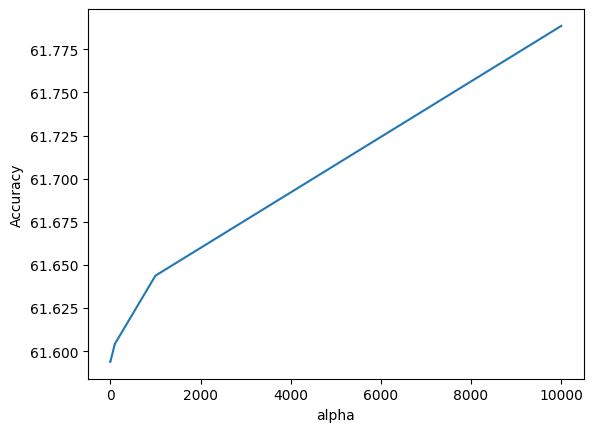

In [ ]:
# All the lines of code in this cell were taken from Reference [4].

plt.plot(alpha_values, lap_acc)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

**Deriving the Top 10 words that predicts each class**

In [ ]:
# All the lines of code in this cell were written by me.

# Top 10 words - fresh
sorted_fresh_train = sorted(fresh_word_dict_train.items(), key=lambda x: x[1], reverse=True)
print(f"Top 10 words that predicts 'fresh' class : {dict(sorted_fresh_train[:10])}")

# Top 10 words - rotten
sorted_rotten_train = sorted(rotten_word_dict_train.items(), key=lambda x: x[1], reverse=True)
print(f"Top 10 words that predicts 'rotten' class : {dict(sorted_rotten_train[:10])}")

Top 10 words that predicts 'fresh' class : {'the': 164326, 'a': 117840, 'and': 106815, 'of': 98811, 'to': 63249, 'is': 59649, 'in': 44890, 'its': 39411, 'that': 37313, 'it': 36195}
Top 10 words that predicts 'rotten' class : {'the': 162507, 'a': 106773, 'of': 86539, 'and': 82134, 'to': 72963, 'is': 54275, 'in': 40794, 'it': 38326, 'its': 38124, 'that': 37730}


**Calculating final accuracy on test dataset with optimal hyperparameter (alpha)**

In [ ]:
# All the lines of code in this cell were taken from Reference [4].

alpha = 10000
test_pred = predict_alpha(testset, alpha, rotten_word_prob_dict_train, fresh_word_prob_dict_train)

lap_test_accuracy = accuracyscore(testset["Freshness"].to_list(), test_pred)
print(f'Final Accuracy on Test Dataset after applying Laplace smoothing : {lap_test_accuracy} %')

Final Accuracy on Test Dataset after applying Laplace smoothing : 61.89479166666667 %
